# Predictive Modeling: Vehicle Fuel Efficiency (MPG)


### **Objective:** Compare model performance using quantitative metrics and analyze feature importance.

### **Dataset:** modeling_dataset.csv

1. Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("modeling_dataset.csv")

y = df["Combined MPG (FT1)"]
x = df.drop("Combined MPG (FT1)", axis=1)

Identify numeric and categorical features

In [3]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object', 'category']).columns.tolist()

Processing Pipeline

In [4]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


Get Feature Importance

In [5]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

model.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine Cylinders',
                                                   'Engine Displacement']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model', 'Class',
                                                   'Drive', 'Transmission',
                                                   'Fuel Type'])])),
                ('model', LinearRegression())])

In [6]:
encoded_cat_features = (
    model.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
)

features = np.concatenate([numeric_features, encoded_cat_features])
coefficients = model.named_steps["model"].coef_

In [7]:
feat_coef = pd.DataFrame({
    "feature": features,
    "coefficient": coefficients
})

5.4.1 Top Ten List

In [8]:
top10 = feat_coef.reindex(feat_coef.coefficient.abs().sort_values(ascending=False).index).head(10)
print(top10)

                 feature  coefficient
2070    Model_Ioniq Blue    32.399264
2609     Model_Prius Eco    29.963679
2069         Model_Ioniq    29.397325
2612       Model_Prius c    23.507000
2389     Model_Metro XFI    23.198334
2497       Model_Niro FE    23.028605
3233     Model_Sprint ER    22.642186
3234  Model_Sprint Metro    22.071172
2496          Model_Niro    22.027959
2608         Model_Prius    21.006464


5.4.2 Top Ten Bar Plot

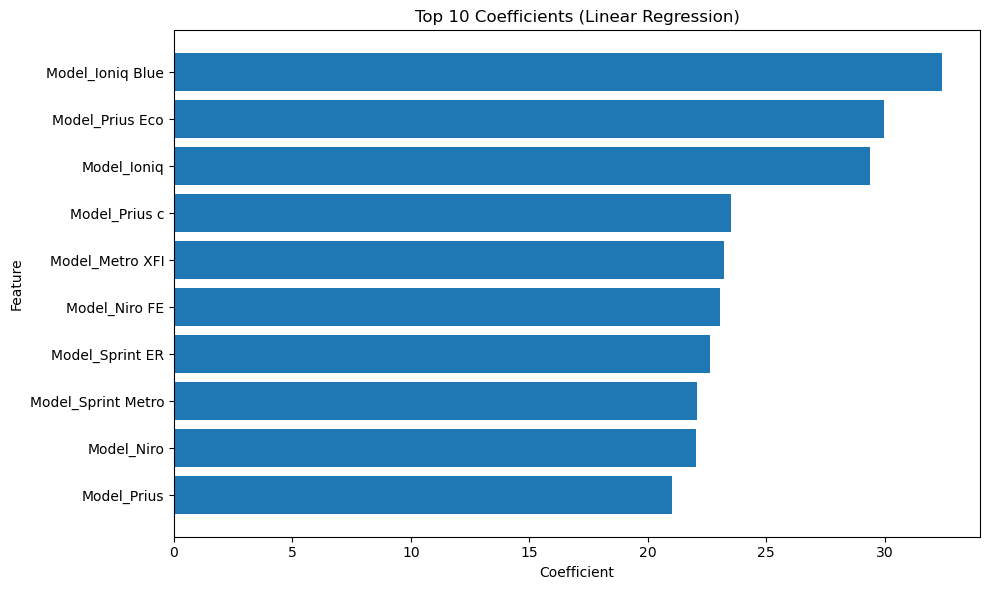

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(top10["feature"], top10["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 10 Coefficients (Linear Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Insight Summary

Using the Linear Regression model, the features with the strongest influence on Combined MPG are specific high-efficiency vehicle models, such as the Hyundai Ioniq Blue, Toyota Prius Eco, Hyundai Ioniq, Toyota Prius c, and Chevrolet Metro XFI. These models have the largest positive coefficients, meaning they contribute heavily to higher fuel efficiency. These results provide insight into the question: “Can vehicle fuel efficiency (Combined MPG) be accurately predicted using basic vehicle specifications, and which factors most strongly influence fuel economy?” Specifically, the analysis shows that hybrids are engineered for fuel economy and show an extremely large positive effects, while standard gasoline models would show lower or negative coefficients. This highlights that the specific vehicle model matters the most for predicting fuel efficiency, much more than engine size or drivetrain in the linear model.